# 01. Load Data

02. Load CSV files into Dataframes and optionally process

In [20]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az

import datautil as du
from analysis_util_01 import MMM, MMMChannelsStraight, MMMChannelsStraightConfounder, MMMFbGoogleMetrics

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)

In [22]:
data = du.get_collected_dataframe()
# create an index col for easy plotting
data['dt'] = data['date']
data.set_index('dt', inplace=True)
data.head()

,date,spend_fb,impressions_fb,clicks_fb,purchases_fb,spend_google,impressions_google,clicks_google,sales
dt,,,,,,,,,
2023-09-13,2023-09-13,1044.52,158057.0,2863.0,7.0,17731.458630,350223.0,3818.0,125087.3010
2023-09-14,2023-09-14,746.37,110849.0,1691.0,6.0,15614.170441,206164.0,3640.0,142865.4874
2023-09-15,2023-09-15,0.00,0.0,0.0,8.0,11892.922135,240704.0,3075.0,200679.1577
2023-09-16,2023-09-16,0.00,0.0,0.0,8.0,10958.380107,247014.0,2979.0,120231.9569
2023-09-17,2023-09-17,0.00,0.0,0.0,6.0,14914.932425,249658.0,3666.0,166163.5059


# 02. Explore data

<Axes: >

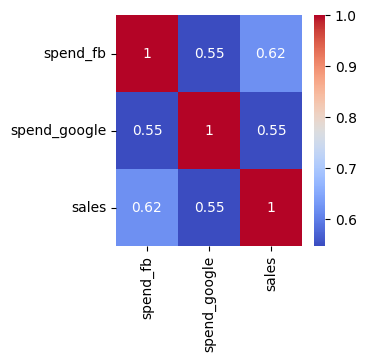

In [23]:
# correlation of media spend with sales
corr = data[["spend_fb", "spend_google", "sales"]].corr()
fig, ax = plt.subplots()
fig.set_size_inches(3, 3)
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=ax)

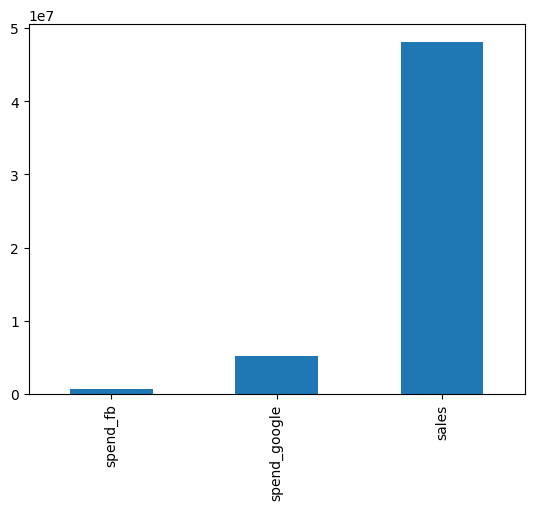

In [24]:
data[["spend_fb", "spend_google", "sales"]].sum().plot(kind='bar')
plt.show()

<Axes: xlabel='dt'>

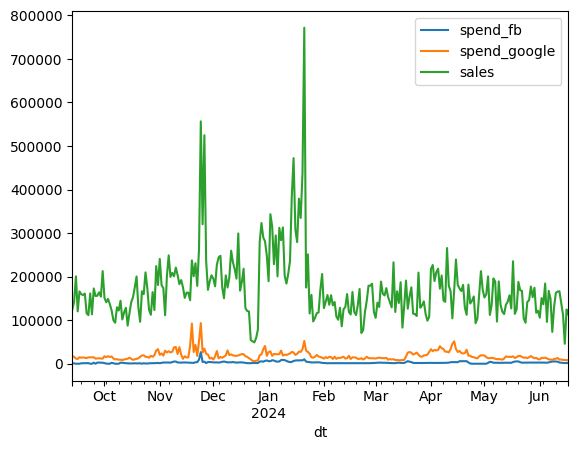

In [25]:
fig, ax = plt.subplots()
data[["spend_fb", "spend_google", "sales"]].plot(ax=ax)

<Axes: xlabel='dt'>

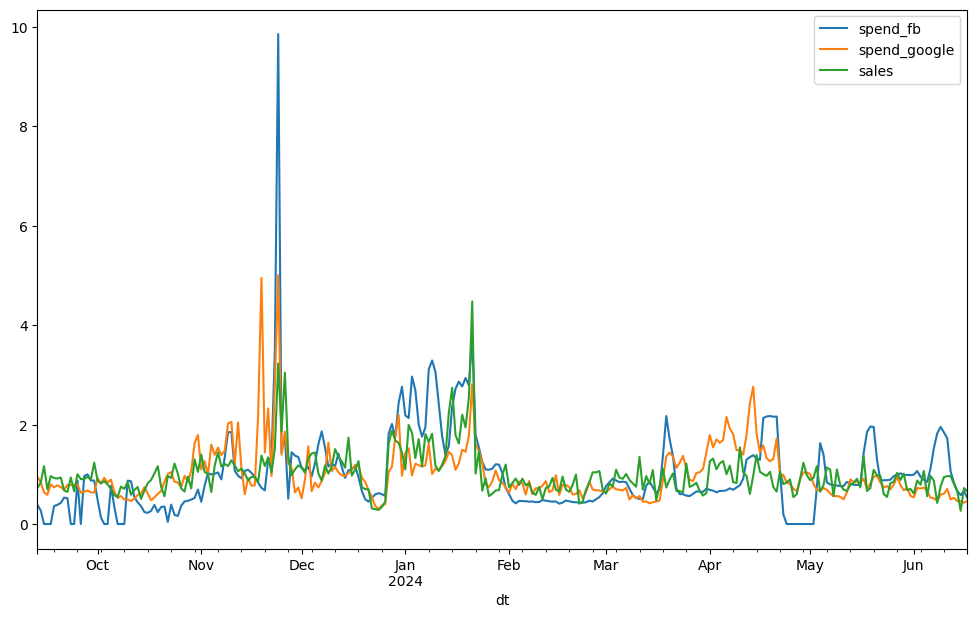

In [26]:
cols = ["spend_fb", "spend_google", "sales"]
df = data[cols].copy()
for key in cols:
    avg = df[key].mean()
    df[key] = df[key] * 1 / avg

fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
df[["spend_fb", "spend_google", "sales"]].plot(ax=ax)

# 03. Model 

In [32]:
# mmm = MMMFbGoogleMetrics(data, fb_metric="clicks_fb", google_metric="clicks_google")
# mmm = MMMFbGoogleMetrics(data, fb_metric="purchases_fb", google_metric="clicks_google")
mmm = MMMChannelsStraight(data, channelnames=["spend_fb", "spend_google"], allowIntercept=True)
mmm.define_model()


/workspaces/mmm_experiments/Mongine/analysis_util_01.py:71: SyntaxWarning: invalid escape sequence '\%'
  label=f"${100 * hdi_prob}\%$ HDI",


In [33]:
mmm.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [intercept, sigma, beta]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


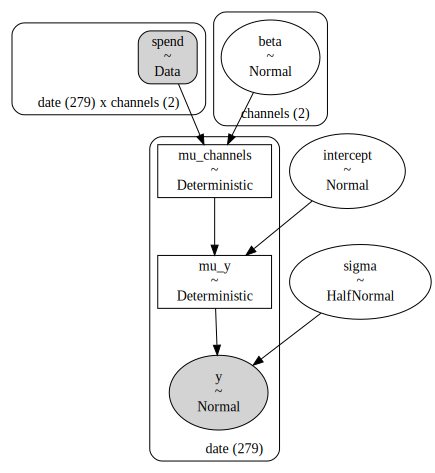

In [34]:
pm.model_to_graphviz(model=mmm.model)

Sampling: []


Output()

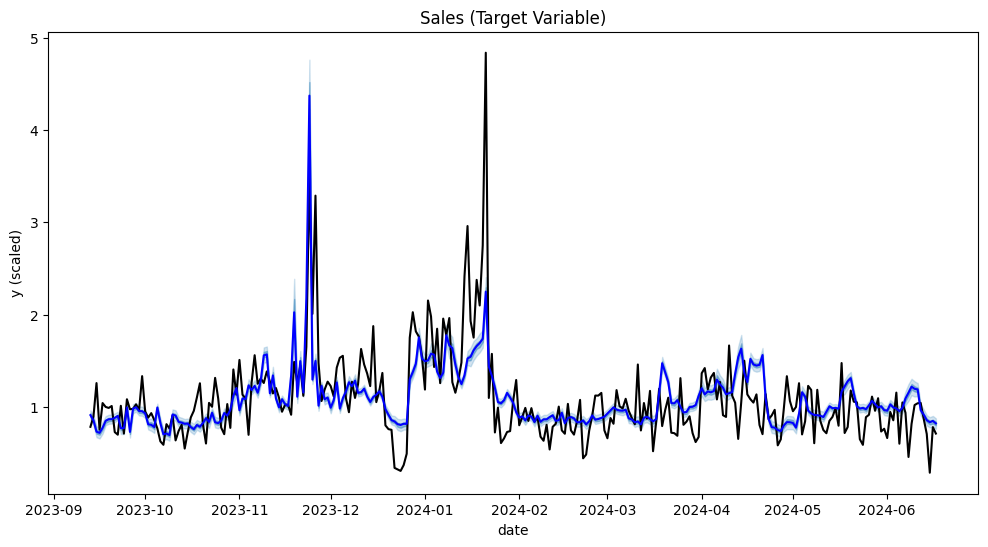

In [35]:
mmm.plot_posterior_predictive()

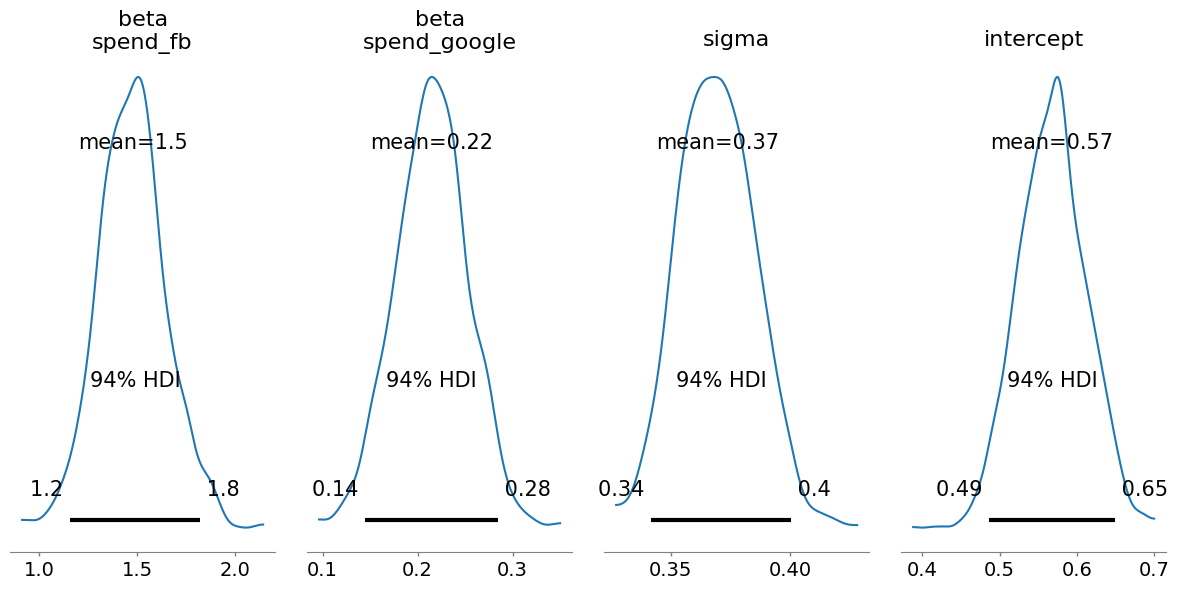

In [36]:
mmm.plot_parm_dist()